<a href="https://colab.research.google.com/github/Say2hub/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23197 entries, 0 to 23196
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23197 non-null  object
 1   text     22867 non-null  object
 2   subject  22867 non-null  object
 3   date     23197 non-null  object
 4   label    23197 non-null  object
dtypes: object(5)
memory usage: 906.3+ KB
None

Class Distribution:
                                               title  \
0                                              title   
1  Kandi Burruss Explodes Over Rape Accusation on...   
2  People's Choice Awards 2018: The best red carp...   
3  Sophia Bush Sends Sweet Birthday Message to 'O...   
4  Colombian singer Maluma sparks rumours of inap...   

                                                text              subject  \
0                                           news_url        source_domain   
1  http://toofab.com/2017/05/08/real-housewives-a... 

<ipython-input-18-220113b174ec>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


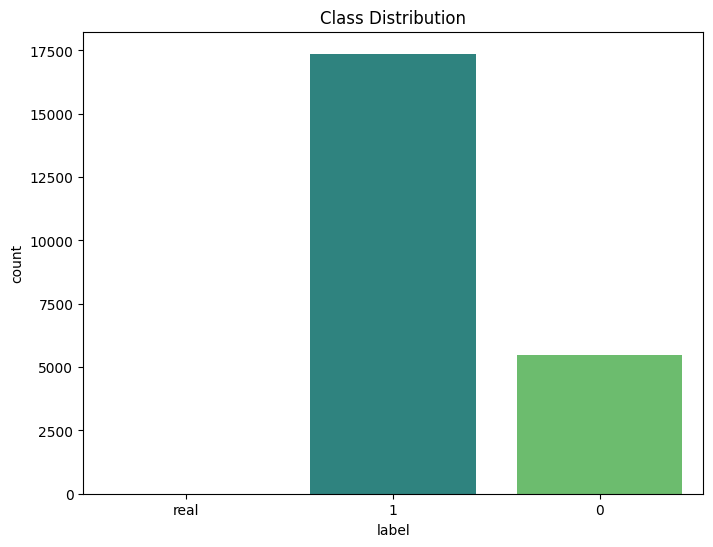

<ipython-input-18-220113b174ec>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words_df, palette='muted')


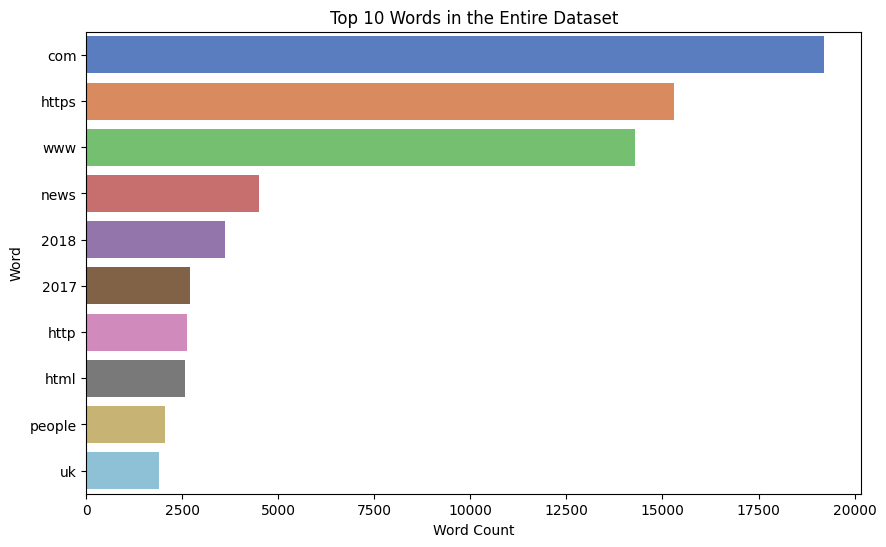

Accuracy: 0.83

Confusion Matrix:
[[ 319  761]
 [  13 3481]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.30      0.45      1080
           1       0.82      1.00      0.90      3494

    accuracy                           0.83      4574
   macro avg       0.89      0.65      0.68      4574
weighted avg       0.85      0.83      0.79      4574



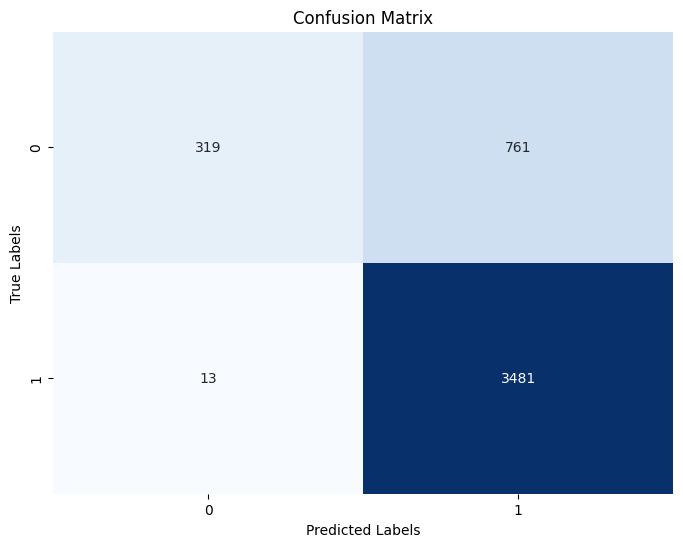

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('/content/FakeNewsNet.csv.zip', names=['title', 'text', 'subject', 'date', 'label'])



print("Dataset Information:")
print(data.info())
print("\nClass Distribution:")
print(data.head())
print(data['label'].isnull().sum())
#Missing Values
data['text'].isnull().sum()
data.dtypes

# Remove rows with missing values in the 'text' column
data = data.dropna(subset=['text'])

# Convert the 'text' column to string type if it's not already
data['text'] = data['text'].astype(str)

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Class Distribution')
plt.show()



# Bar graph of most repeated words(Top 10)
top_words_count = 10

vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(data['text'])
word_counts = word_counts.sum(axis=0).A1
word_freq_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'count': word_counts})
top_words_df = word_freq_df.sort_values(by='count', ascending=False).head(top_words_count)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=top_words_df, palette='muted')
plt.title(f'Top {top_words_count} Words in the Entire Dataset')
plt.xlabel('Word Count')
plt.ylabel('Word')
plt.show()


train_data, test_data, train_labels, test_labels = train_test_split(
    data['text'], data['label'], test_size=0.2, random_state=42
)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
train_features = tfidf_vectorizer.fit_transform(train_data)
test_features = tfidf_vectorizer.transform(test_data)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_features, train_labels)


predictions = naive_bayes_classifier.predict(test_features)

# Model Evaluation
accuracy = accuracy_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)
classification_rep = classification_report(test_labels, predictions)

# Accuracy Results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()